<a href="https://colab.research.google.com/github/ChintPatel/CMPE258-HW2/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import datetime
import pandas as pd


In [6]:
# Ensure zipfile is imported
import zipfile
# Unzip dataset

zip_path = '/content/glasses-Dataset.zip'
unzip_path = '/content/glasses-Dataset/'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)

# Define directories
train_dir = os.path.join(unzip_path, 'train')
valid_dir = os.path.join(unzip_path, 'validate')
test_dir = os.path.join(unzip_path, 'test')

# Data preprocessing and augmentation
data_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
train_data = data_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=True)
valid_data = data_gen.flow_from_directory(valid_dir, target_size=(150, 150), batch_size=32, class_mode='binary', shuffle=True)

# Load test data from a single directory without subfolders
test_gen = ImageDataGenerator(rescale=1./255)
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({'filename': test_filenames})
test_data = test_gen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='filename',
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Setup TensorBoard logging
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=25, validation_data=valid_data, callbacks=[tensorboard_callback])




Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 20 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4489 - loss: 2.2515 - val_accuracy: 0.5000 - val_loss: 0.7262
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5634 - loss: 0.6826 - val_accuracy: 0.7000 - val_loss: 0.6710
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6357 - loss: 0.6613 - val_accuracy: 0.7000 - val_loss: 0.6426
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5679 - loss: 0.6646 - val_accuracy: 0.6500 - val_loss: 0.6469
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7450 - loss: 0.5977 - val_accuracy: 0.6750 - val_loss: 0.6027
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7173 - loss: 0.5612 - val_accuracy: 0.6000 - val_loss: 0.6508
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8001 - loss: 0.4609 - val_accuracy: 0.6750 - val_loss: 0.5766
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.8302 - loss: 0.3913 - val_accuracy: 0.6000 - val_loss: 0.7353
Epoch 9/25
4/4 

In [9]:
# Save model
model.save('glasses_classification_model.h5')
print("Image Classification Model Completed & Saved.")

Image Classification Model Completed & Saved.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
              precision    recall  f1-score   support

  No Glasses       0.55      0.60      0.57        10
     Glasses       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



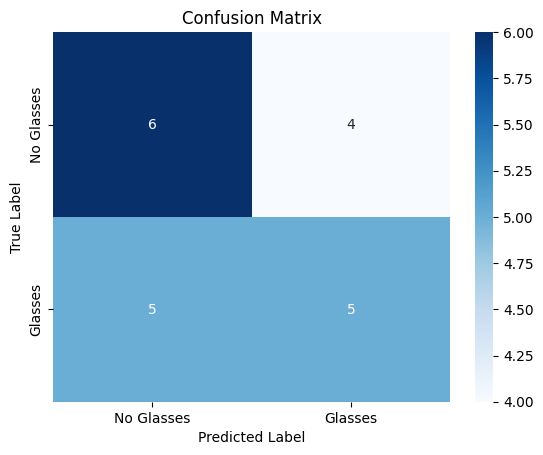

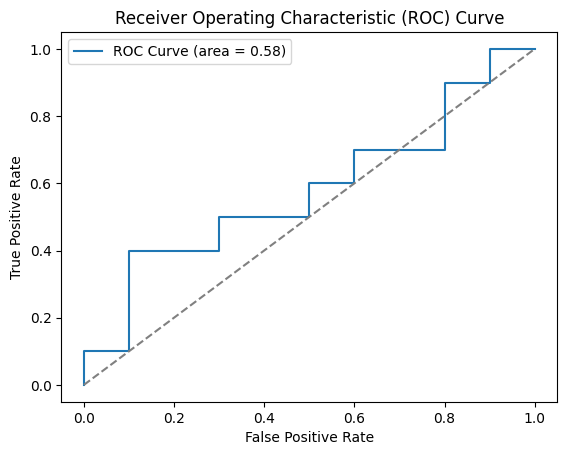

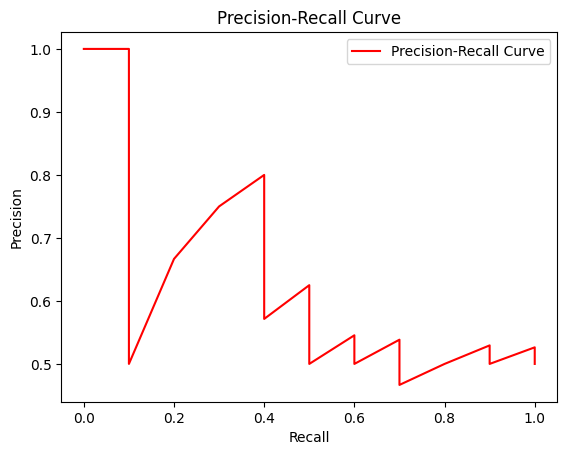

In [11]:
# Evaluate model
y_true = np.array([0] * (len(test_data.filenames) // 2) + [1] * (len(test_data.filenames) // 2))
y_pred_probs = model.predict(test_data)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Classification Report
report = classification_report(y_true, y_pred, target_names=['No Glasses', 'Glasses'])
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Glasses', 'Glasses'], yticklabels=['No Glasses', 'Glasses'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
plt.plot(recall, precision, label='Precision-Recall Curve', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

